<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [13]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [14]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [15]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [16]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


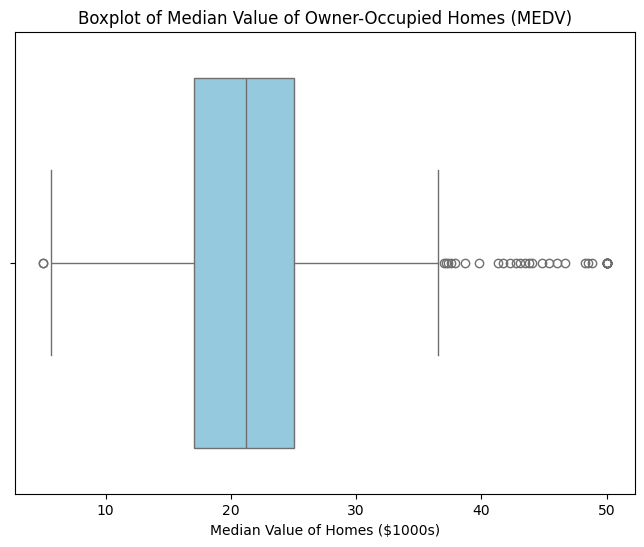

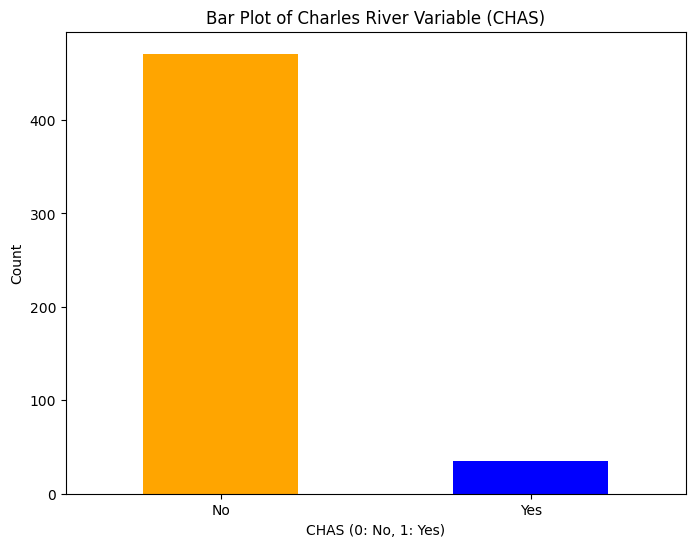

<ipython-input-17-b06822c0edae>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='viridis')


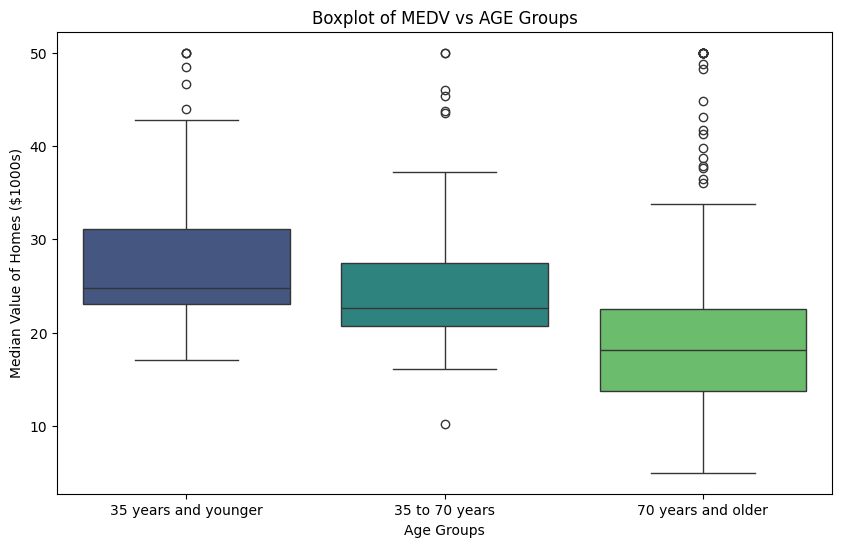

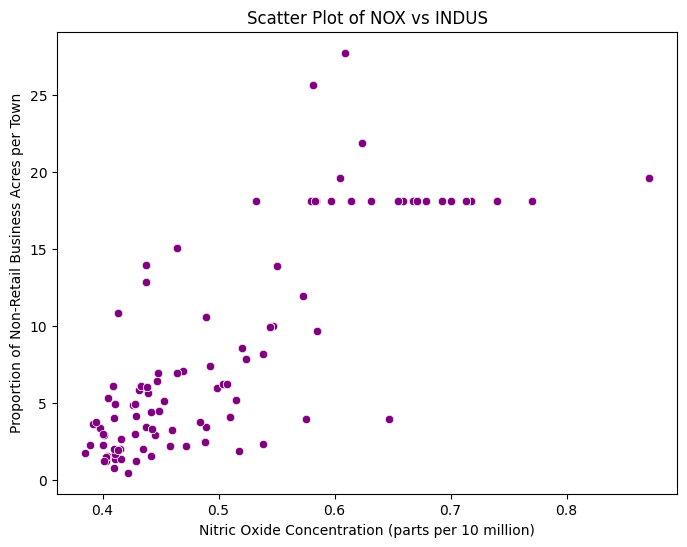

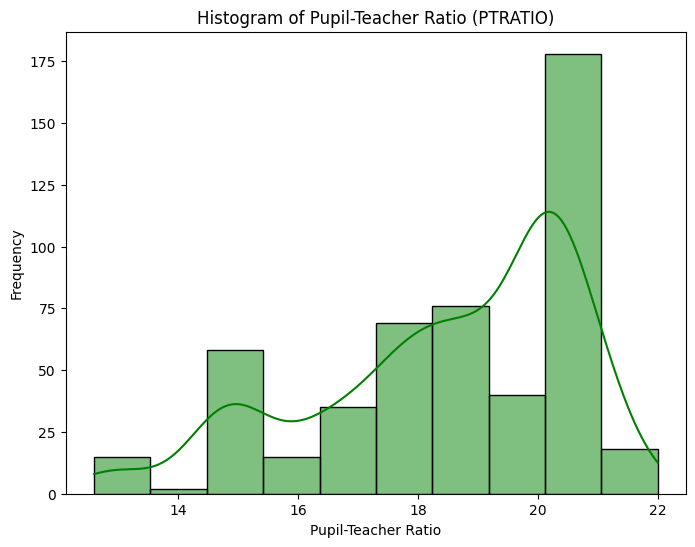

In [17]:
# Task 2: Generate Descriptive Statistics and Visualizations

# 1. Boxplot for Median Value of Owner-Occupied Homes (MEDV)

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('Median Value of Homes ($1000s)')
plt.show()

# 2. Bar Plot for the Charles River Variable (CHAS)
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# 3. Boxplot for MEDV vs AGE (Discretized AGE)
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df, palette='viridis')
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Value of Homes ($1000s)')
plt.show()

# 4. Scatter Plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='purple')
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()

# 5. Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True, color='green')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# Findings:
# 1. MEDV Boxplot: Displays the distribution and potential outliers in house prices.
# 2. CHAS Bar Plot: Highlights the count of tracts near the Charles River (binary variable).
# 3. MEDV vs AGE: Shows how house values vary with the age of owner-occupied units.
# 4. NOX vs INDUS Scatter Plot: Indicates the relationship between industrial areas and pollution.
# 5. PTRATIO Histogram: Depicts the distribution of the pupil-to-teacher ratio.

In [18]:
# Task 3: Statistical Tests

# 1. T-test for independent samples: Median value of houses bounded by the Charles River
# Hypotheses:
# H0: There is no significant difference in median value of houses bounded by the Charles River or not.
# H1: There is a significant difference in median value of houses bounded by the Charles River or not.

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("T-test Results:")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject H0: There is a significant difference in median values.")
else:
    print("Fail to reject H0: No significant difference in median values.")

# 2. ANOVA: Median values of houses for each proportion of owner-occupied units built prior to 1940 (AGE)
# Hypotheses:
# H0: There is no difference in median values of houses across AGE groups.
# H1: There is a difference in median values of houses across AGE groups.

grouped_AGE = boston_df.groupby('AGE_Group')['MEDV']

# Perform ANOVA
anova_result = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print("\nANOVA Results:")
print(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print("Reject H0: There is a significant difference in median values across AGE groups.")
else:
    print("Fail to reject H0: No significant difference in median values across AGE groups.")

# 3. Pearson Correlation: NOX and INDUS
# Hypotheses:
# H0: There is no relationship between NOX and INDUS.
# H1: There is a relationship between NOX and INDUS.

correlation, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\nPearson Correlation Results:")
print(f"Correlation Coefficient: {correlation:.3f}, P-value: {p_value_corr:.3f}")
if p_value_corr < 0.05:
    print("Reject H0: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject H0: No significant relationship between NOX and INDUS.")

# 4. Regression Analysis: DIS and MEDV
# Hypotheses:
# H0: There is no impact of DIS on MEDV.
# H1: There is an impact of DIS on MEDV.

regression_model = ols('MEDV ~ DIS', data=boston_df).fit()

print("\nRegression Analysis Results:")
print(regression_model.summary())
if regression_model.pvalues['DIS'] < 0.05:
    print("Reject H0: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject H0: DIS does not have a significant impact on MEDV.")

# Findings Summary:
# 1. T-test: Determines whether proximity to the Charles River affects house values.
# 2. ANOVA: Analyzes the effect of house age groups on median values.
# 3. Pearson Correlation: Explores the relationship between pollution and industrialization.
# 4. Regression: Assesses how distance to employment centers influences house prices.

T-test Results:
T-statistic: 3.113, P-value: 0.004
Reject H0: There is a significant difference in median values.


<ipython-input-18-291052959922>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_AGE = boston_df.groupby('AGE_Group')['MEDV']



ANOVA Results:
                 sum_sq     df         F        PR(>F)
AGE_Group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


<ipython-input-18-291052959922>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


Reject H0: There is a significant difference in median values across AGE groups.

Pearson Correlation Results:
Correlation Coefficient: 0.764, P-value: 0.000
Reject H0: There is a significant relationship between NOX and INDUS.

Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        14:44:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            non